In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\codex techno project\6th--Wine Quality Prediction\Dataset\archive (2)\WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

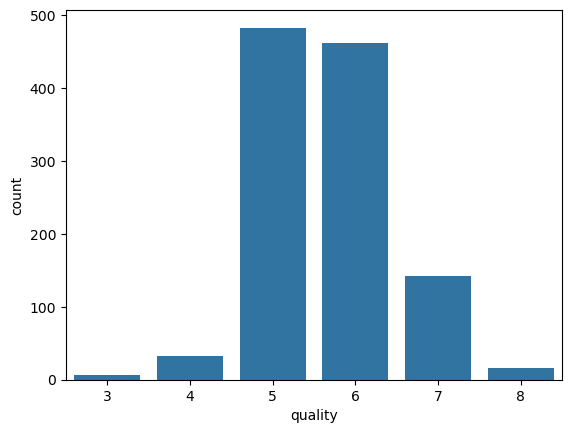

In [3]:
df['quality'].value_counts().sort_index()
sns.countplot(x='quality', data=df)


###  Wine Quality Distribution
- Most wine samples have a **quality score of 5 and 6**, indicating that the dataset is centered around average quality wines.
- Very few samples fall into low (3–4) or high (7–8)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

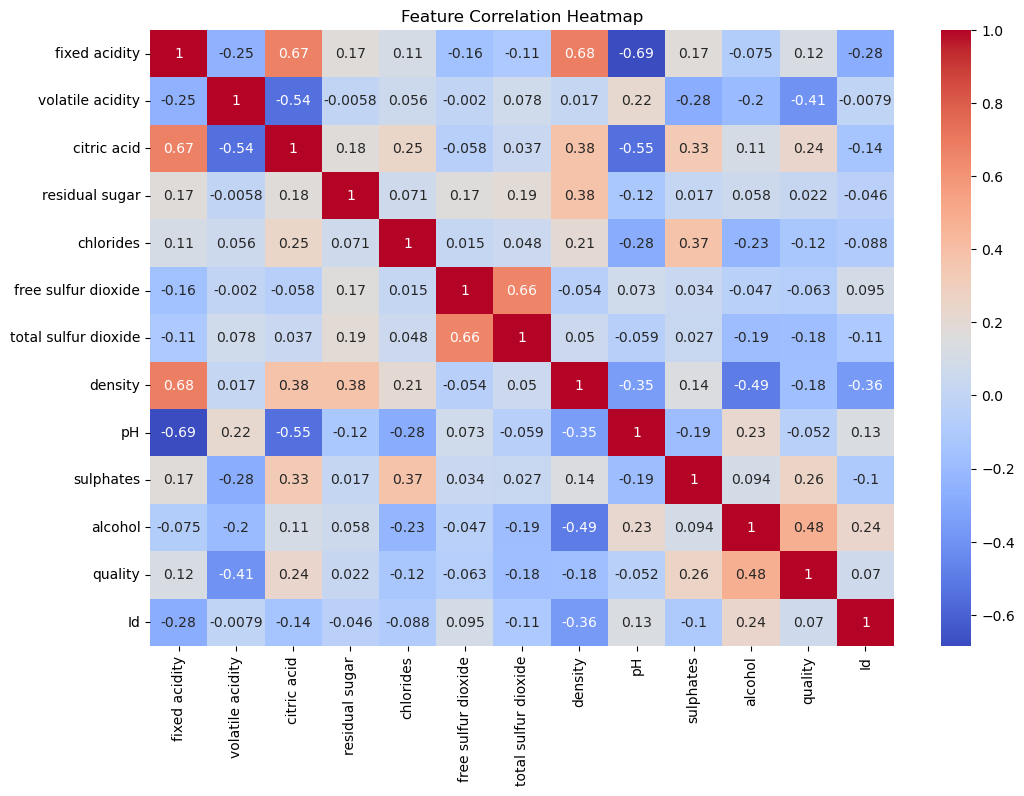

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")


###  Feature Correlation Heatmap
- **Alcohol** has the strongest positive correlation with quality (~ **0.48**), meaning higher alcohol content usually indicates better wine.
- **Volatile acidity** is negatively correlated (~ **-0.26**) with quality, implying higher acidity tends to reduce quality.
- Moderate positive correlations: **Sulphates**, **citric acid**.
- Very low correlation features like **residual sugar** and **chlorides** may not significantly impact the quality prediction.

In [6]:
# Binary classification
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier()

In [11]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)


SVC()

In [12]:
from sklearn.metrics import classification_report

# Example for Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       102
           1       0.83      0.79      0.81       127

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



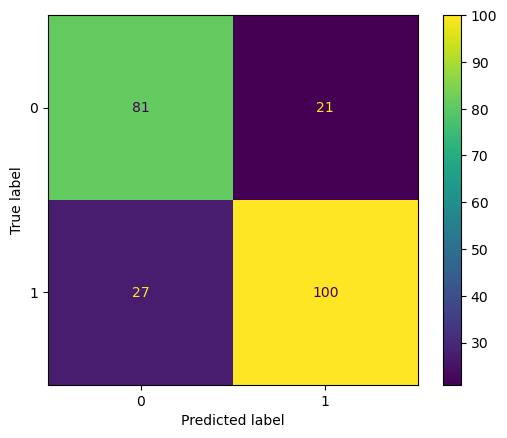

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


###  Confusion Matrix
- The model shows good classification accuracy with:
  - **True Positives**: 100
  - **True Negatives**: 81
  - **False Positives**: 21
  - **False Negatives**: 27
- Performance is promising, but there is potential to improve through hyperparameter tuning or handling class imbalance.


Text(0.5, 1.0, 'Feature Importance - Random Forest')

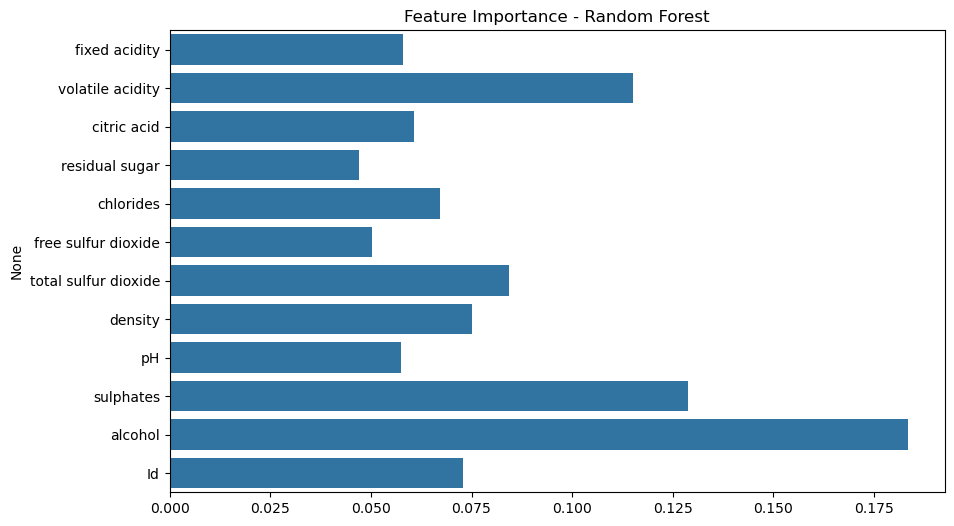

In [14]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")


###  Feature Importance (Random Forest)
- **Alcohol** is the top predictor of wine quality.
- Other important features: **Sulphates**, **volatile acidity**, **total sulfur dioxide**.
- Less important features include: **free sulfur dioxide**, **chlorides**, and **residual sugar**.
- Feature importance aligns with correlation values, reinforcing that **alcohol and sulphates** are key indicators of quality.
